<a href="https://colab.research.google.com/github/nikitaagarwal1992/Data-science/blob/main/Supervised_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/customer_purchase_data.csv')

In [ ]:
"""
Age: Customer's age
Gender: Customer's gender (0: Male, 1: Female)
Annual Income: Annual income of the customer in dollars
Number of Purchases: Total number of purchases made by the customer
Product Category: Category of the purchased product (0: Electronics, 1: Clothing, 2: Home Goods, 3: Beauty, 4: Sports)
Time Spent on Website: Time spent by the customer on the website in minutes
Loyalty Program: Whether the customer is a member of the loyalty program (0: No, 1: Yes)
Discounts Availed: Number of discounts availed by the customer (range: 0-5)
PurchaseStatus (Target Variable): Likelihood of the customer making a purchase (0: No, 1: Yes)
"""

"\nAge: Customer's age\nGender: Customer's gender (0: Male, 1: Female)\nAnnual Income: Annual income of the customer in dollars\nNumber of Purchases: Total number of purchases made by the customer\nProduct Category: Category of the purchased product (0: Electronics, 1: Clothing, 2: Home Goods, 3: Beauty, 4: Sports)\nTime Spent on Website: Time spent by the customer on the website in minutes\nLoyalty Program: Whether the customer is a member of the loyalty program (0: No, 1: Yes)\nDiscounts Availed: Number of discounts availed by the customer (range: 0-5)\nPurchaseStatus (Target Variable): Likelihood of the customer making a purchase (0: No, 1: Yes)\n"

In [ ]:
data.head(10)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
5,66,1,37758.117475,14,4,17.827493,0,2,0
6,39,1,126883.385286,16,3,42.085384,1,4,1
7,64,1,39707.359724,13,2,17.190292,1,0,0
8,43,0,102797.301269,20,1,6.023475,0,3,0
9,20,1,63854.921080,16,0,38.572466,0,5,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [ ]:
data.isnull().sum()

,0
Age,0
Gender,0
AnnualIncome,0
NumberOfPurchases,0
ProductCategory,0
TimeSpentOnWebsite,0
LoyaltyProgram,0
DiscountsAvailed,0
PurchaseStatus,0


<Axes: ylabel='AnnualIncome'>

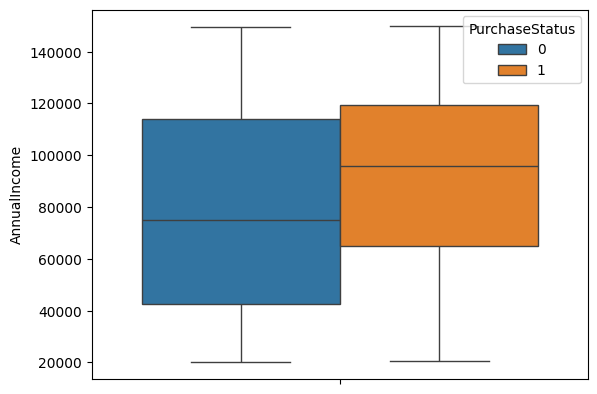

In [ ]:
sns.boxplot(data = data, y = 'AnnualIncome', hue  = 'PurchaseStatus')

<Axes: ylabel='TimeSpentOnWebsite'>

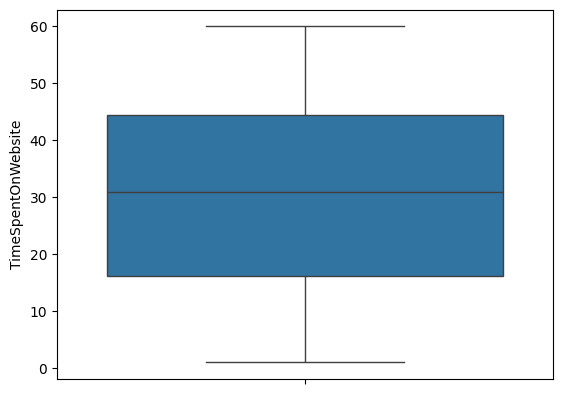

In [ ]:
sns.boxplot(data = data, y = 'TimeSpentOnWebsite')

<Axes: ylabel='NumberOfPurchases'>

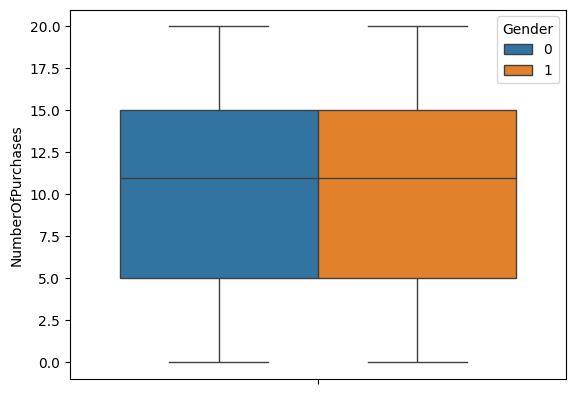

In [ ]:
sns.boxplot(data = data, y = 'NumberOfPurchases',  hue = 'Gender')

<Axes: ylabel='DiscountsAvailed'>

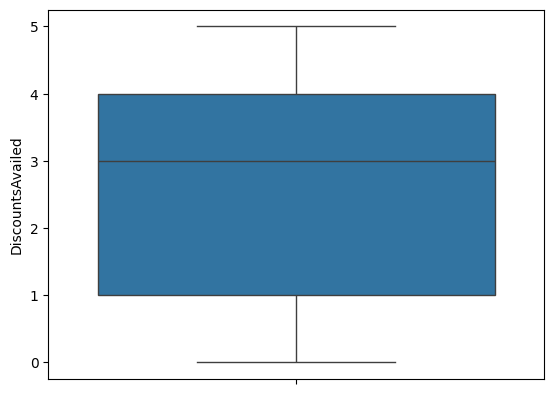

In [ ]:
sns.boxplot(data = data, y = 'DiscountsAvailed')

In [ ]:
data.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


No Outliers or missing data observed.

Convert Product Category to show the names of the products.

In [ ]:
data_product = data.copy()
data_product['ProductCategory'] = data_product['ProductCategory'].replace({0: 'Electronics', 1: 'Clothing', 2: 'Home Goods', 3: 'Beauty', 4: 'Sports'})

In [ ]:
data_product.head(10)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,Electronics,30.568601,0,5,1
1,20,1,23579.773583,4,Home Goods,38.240097,0,5,0
2,27,1,127821.306432,11,Home Goods,31.633212,1,0,1
3,24,1,137798.623120,19,Beauty,46.167059,0,4,1
4,31,1,99300.964220,19,Clothing,19.823592,0,0,1
5,66,1,37758.117475,14,Sports,17.827493,0,2,0
6,39,1,126883.385286,16,Beauty,42.085384,1,4,1
7,64,1,39707.359724,13,Home Goods,17.190292,1,0,0
8,43,0,102797.301269,20,Clothing,6.023475,0,3,0
9,20,1,63854.921080,16,Electronics,38.572466,0,5,1


Rounding the 'Annual Income' and 'Time Spent on Website' number to 2 decimals.

In [ ]:
data_product[['AnnualIncome', 'TimeSpentOnWebsite']] = data_product[['AnnualIncome', 'TimeSpentOnWebsite']].round(2)

In [ ]:
data_product.head(10)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.27,8,Electronics,30.57,0,5,1
1,20,1,23579.77,4,Home Goods,38.24,0,5,0
2,27,1,127821.31,11,Home Goods,31.63,1,0,1
3,24,1,137798.62,19,Beauty,46.17,0,4,1
4,31,1,99300.96,19,Clothing,19.82,0,0,1
5,66,1,37758.12,14,Sports,17.83,0,2,0
6,39,1,126883.39,16,Beauty,42.09,1,4,1
7,64,1,39707.36,13,Home Goods,17.19,1,0,0
8,43,0,102797.30,20,Clothing,6.02,0,3,0
9,20,1,63854.92,16,Electronics,38.57,0,5,1


EDA

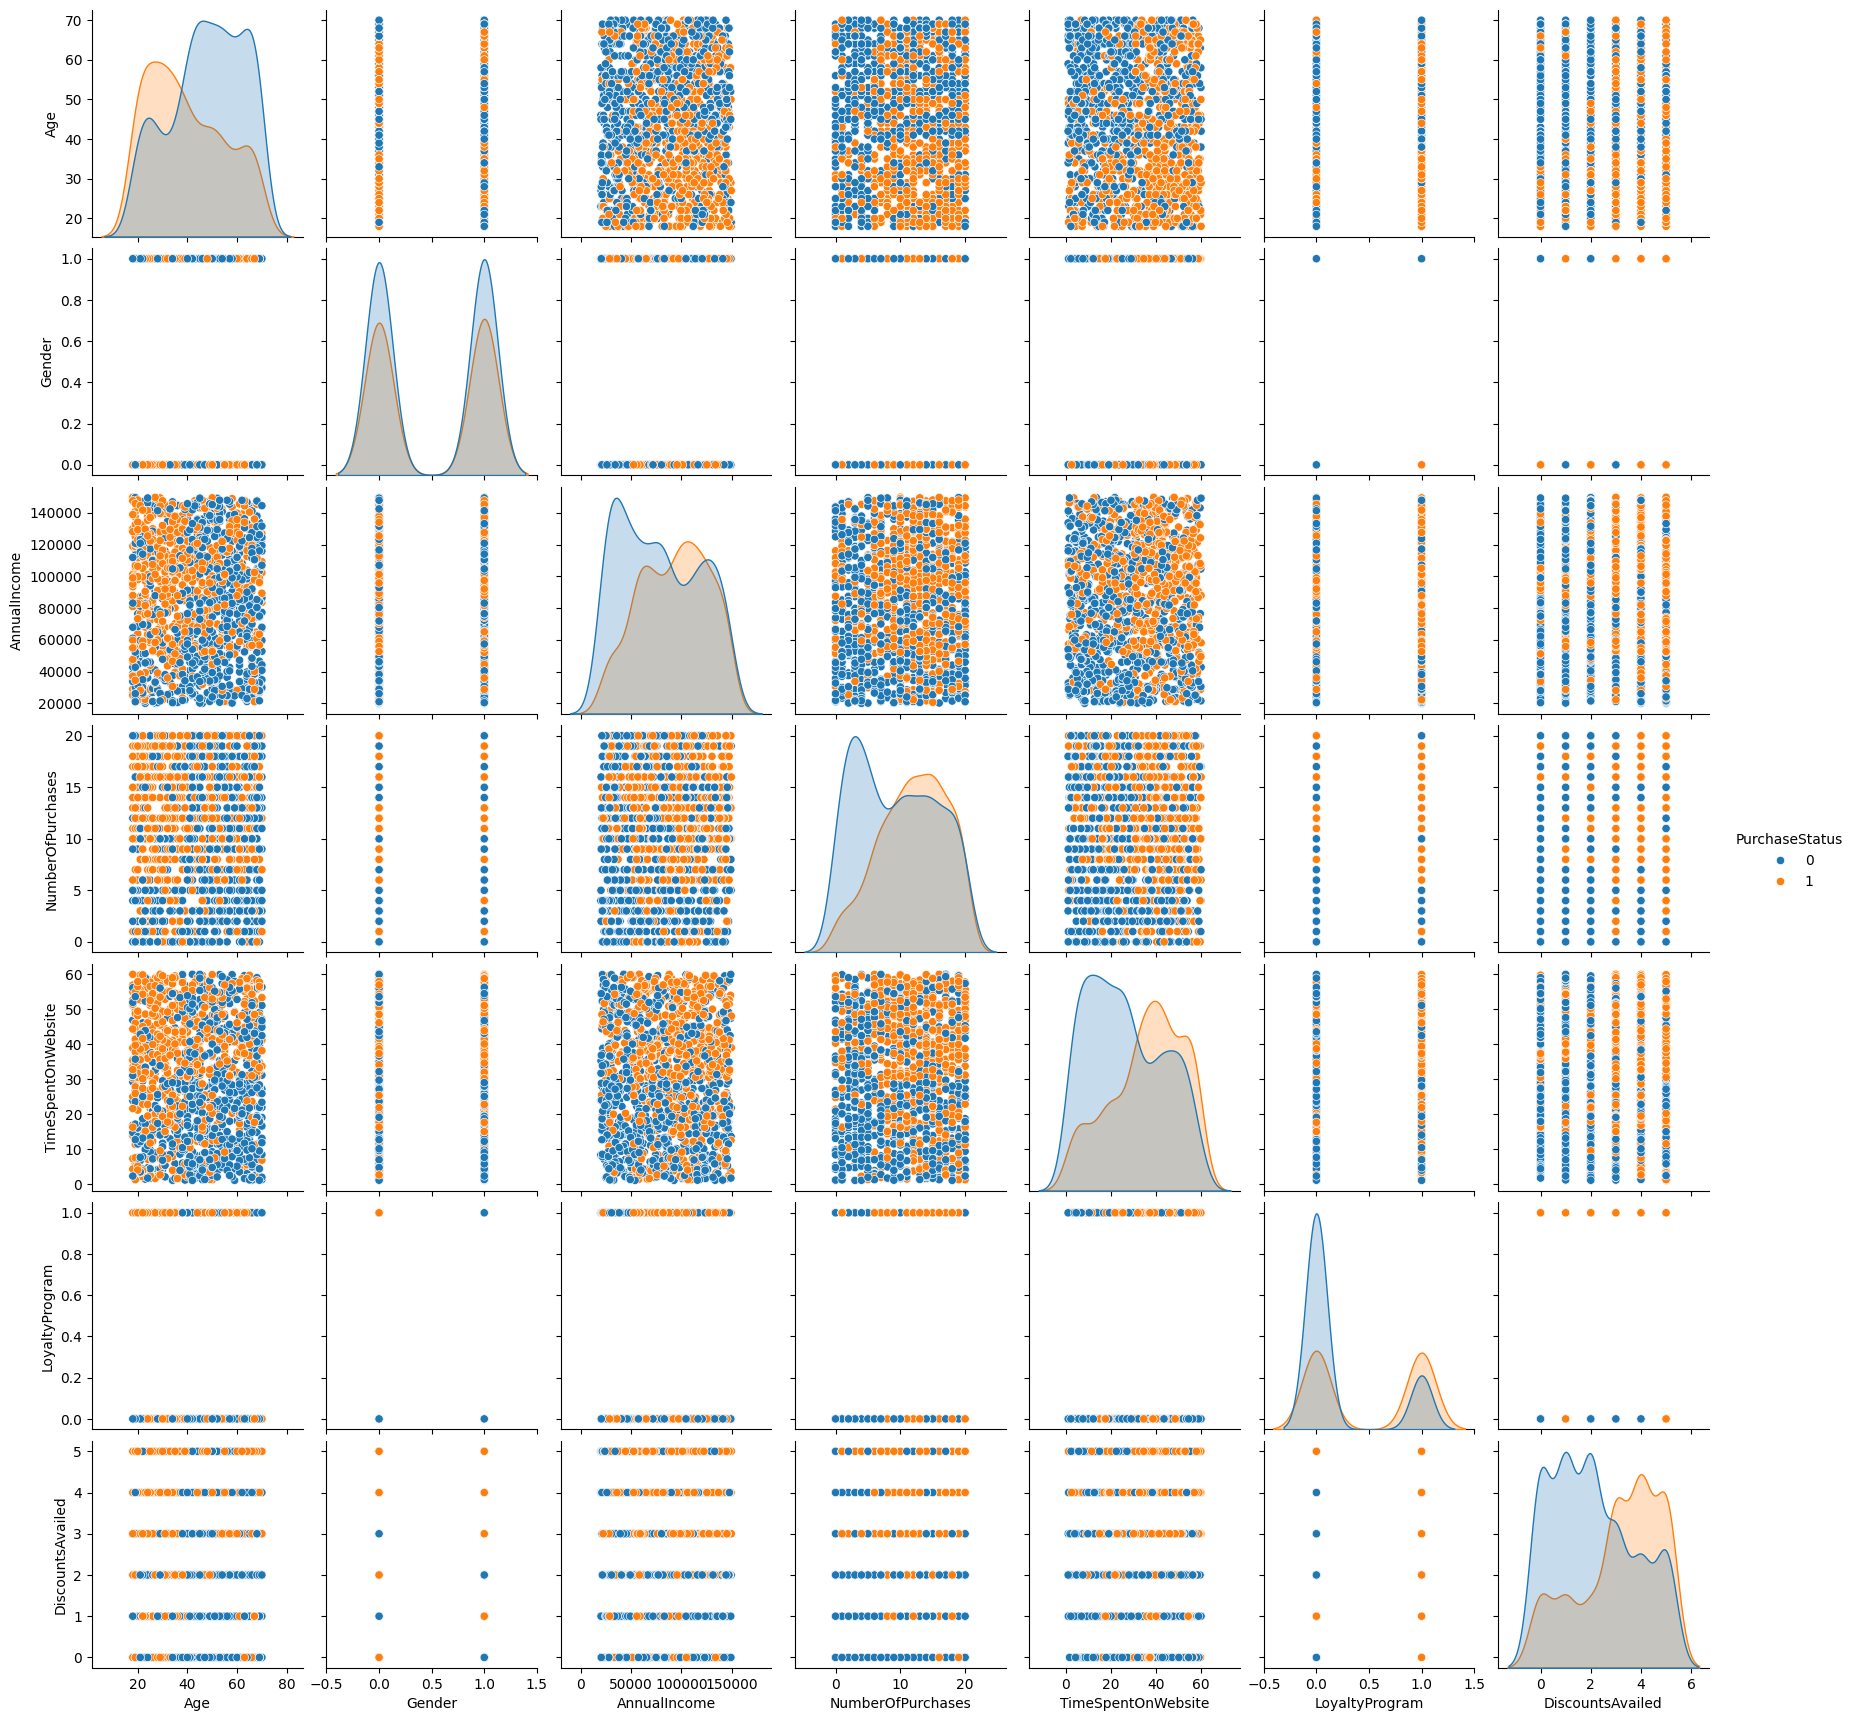

In [ ]:
sns.pairplot(data_product, hue='PurchaseStatus')

In [ ]:
data_product.columns

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus'],
      dtype='object')

In [ ]:
corr = data_product[['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed', 'PurchaseStatus']].corr()

In [ ]:
corr

,Age,Gender,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
Age,1.000000,0.022055,0.016438,-0.038778,0.032310,-0.005980,0.004009,-0.255747
Gender,0.022055,1.000000,0.010054,0.001373,0.012818,0.033302,-0.056624,0.002627
AnnualIncome,0.016438,0.010054,1.000000,0.000276,-0.001497,-0.045296,0.016393,0.188214
NumberOfPurchases,-0.038778,0.001373,0.000276,1.000000,0.024635,0.055358,0.029581,0.222691
TimeSpentOnWebsite,0.032310,0.012818,-0.001497,0.024635,1.000000,0.005962,0.001238,0.277111
LoyaltyProgram,-0.005980,0.033302,-0.045296,0.055358,0.005962,1.000000,-0.048462,0.310838
DiscountsAvailed,0.004009,-0.056624,0.016393,0.029581,0.001238,-0.048462,1.000000,0.303297
PurchaseStatus,-0.255747,0.002627,0.188214,0.222691,0.277111,0.310838,0.303297,1.000000


<Axes: xlabel='ProductCategory', ylabel='PurchaseStatus'>

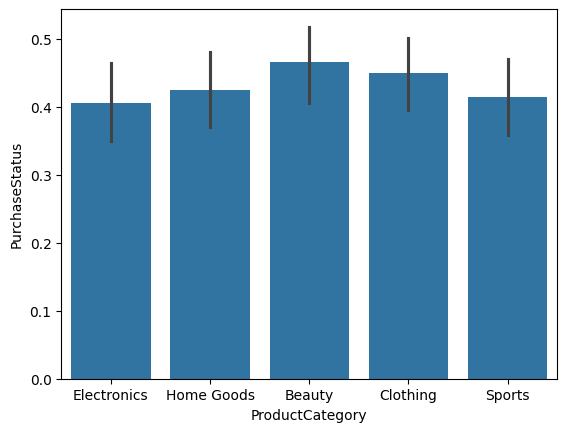

In [ ]:
sns.barplot(data = data_product, x = 'ProductCategory', y = 'PurchaseStatus')

<Axes: xlabel='Gender', ylabel='PurchaseStatus'>

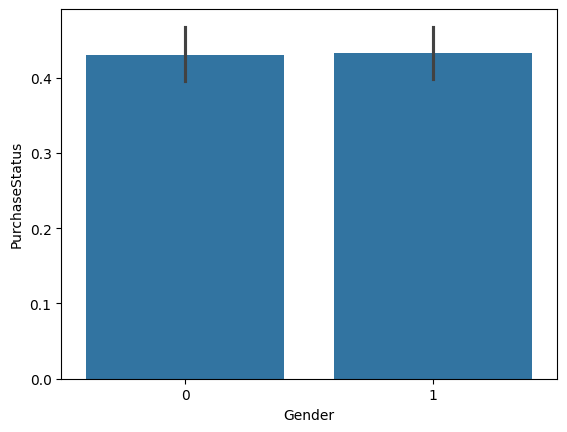

In [ ]:
sns.barplot(data = data_product, x = 'Gender', y = 'PurchaseStatus')

<Axes: xlabel='LoyaltyProgram', ylabel='PurchaseStatus'>

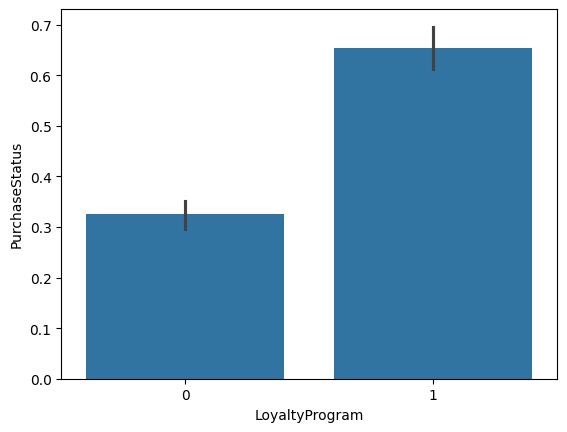

In [ ]:
sns.barplot(data = data_product, x = 'LoyaltyProgram', y = 'PurchaseStatus')

<Axes: xlabel='DiscountsAvailed', ylabel='PurchaseStatus'>

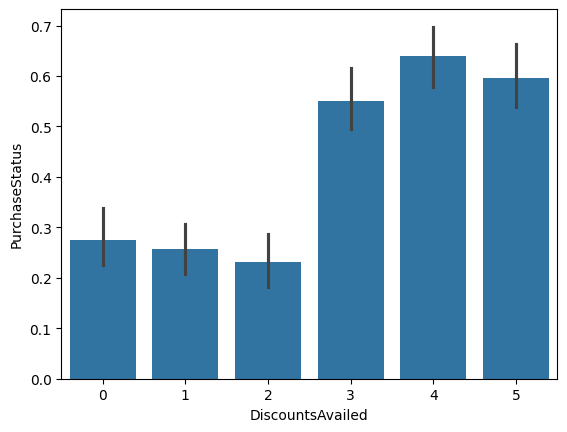

In [ ]:
sns.barplot(data = data_product, x = 'DiscountsAvailed', y = 'PurchaseStatus')

<Axes: xlabel='AnnualIncome', ylabel='Count'>

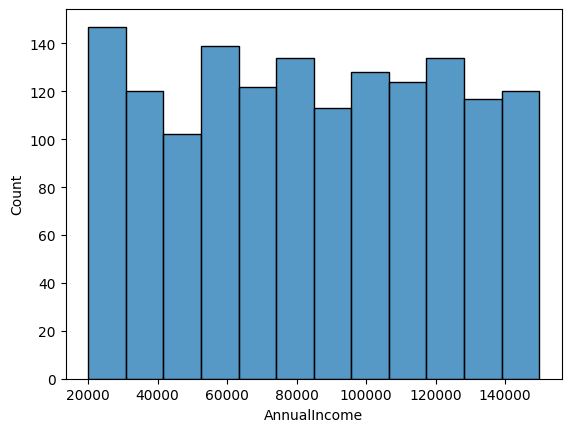

In [ ]:
sns.histplot(data = data_product, x = 'AnnualIncome')

<Axes: xlabel='Age', ylabel='Count'>

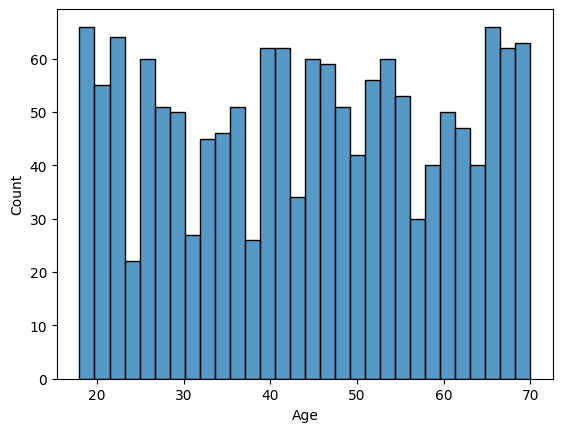

In [ ]:
sns.histplot(data = data_product, x = 'Age', bins = 30)

<Axes: xlabel='PurchaseStatus', ylabel='Count'>

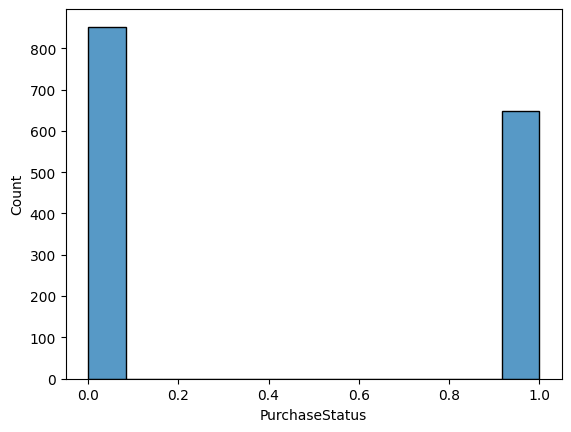

In [ ]:
sns.histplot(data = data_product, x = 'PurchaseStatus')

<Axes: xlabel='LoyaltyProgram', ylabel='PurchaseStatus'>

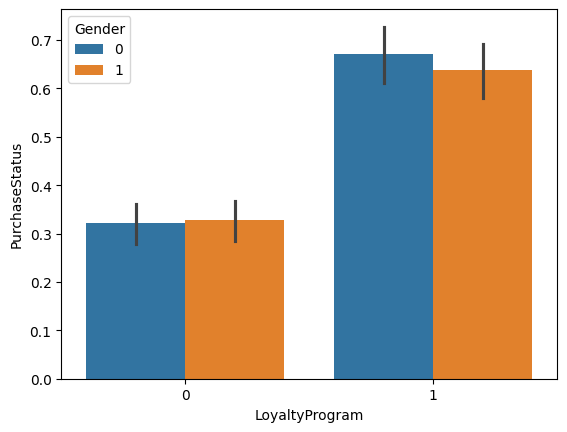

In [ ]:
sns.barplot(data = data_product, x = 'LoyaltyProgram', y = 'PurchaseStatus', hue= 'Gender')

<Axes: xlabel='Age', ylabel='Count'>

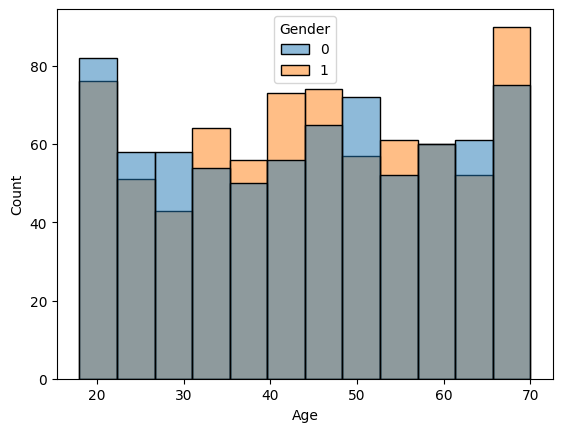

In [ ]:
sns.histplot(data = data_product, x = 'Age', hue = 'Gender')

In [ ]:
age = data_product.value_counts('Age').sort_values().reset_index()

In [ ]:
age.sort_values(by = 'Age')

,Age,count
46,18,34
38,19,32
32,20,30
16,21,25
47,22,37
24,23,27
8,24,22
44,25,34
20,26,26
14,27,24


Convert Categorical data 'Product Category' to Numerical.

In [ ]:
data_product = pd.concat([data_product, pd.get_dummies(data_product["ProductCategory"])], axis=1)
# Apply .astype(int) to the entire concatenated DataFrame instead of just a part of it

In [ ]:
data_product[['Beauty','Clothing','Electronics','Home Goods','Sports']] = data_product[['Beauty','Clothing','Electronics','Home Goods','Sports']].astype(int)

In [ ]:
data_product.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,Beauty,Clothing,Electronics,Home Goods,Sports
0,40,1,66120.27,8,Electronics,30.57,0,5,1,0,0,1,0,0
1,20,1,23579.77,4,Home Goods,38.24,0,5,0,0,0,0,1,0
2,27,1,127821.31,11,Home Goods,31.63,1,0,1,0,0,0,1,0
3,24,1,137798.62,19,Beauty,46.17,0,4,1,1,0,0,0,0
4,31,1,99300.96,19,Clothing,19.82,0,0,1,0,1,0,0,0


In [ ]:
final_data = data_product.drop('ProductCategory', axis = 1)

In [ ]:
final_data.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,Beauty,Clothing,Electronics,Home Goods,Sports
0,40,1,66120.27,8,30.57,0,5,1,0,0,1,0,0
1,20,1,23579.77,4,38.24,0,5,0,0,0,0,1,0
2,27,1,127821.31,11,31.63,1,0,1,0,0,0,1,0
3,24,1,137798.62,19,46.17,0,4,1,1,0,0,0,0
4,31,1,99300.96,19,19.82,0,0,1,0,1,0,0,0


In [ ]:
corr = final_data.corr()

<Axes: >

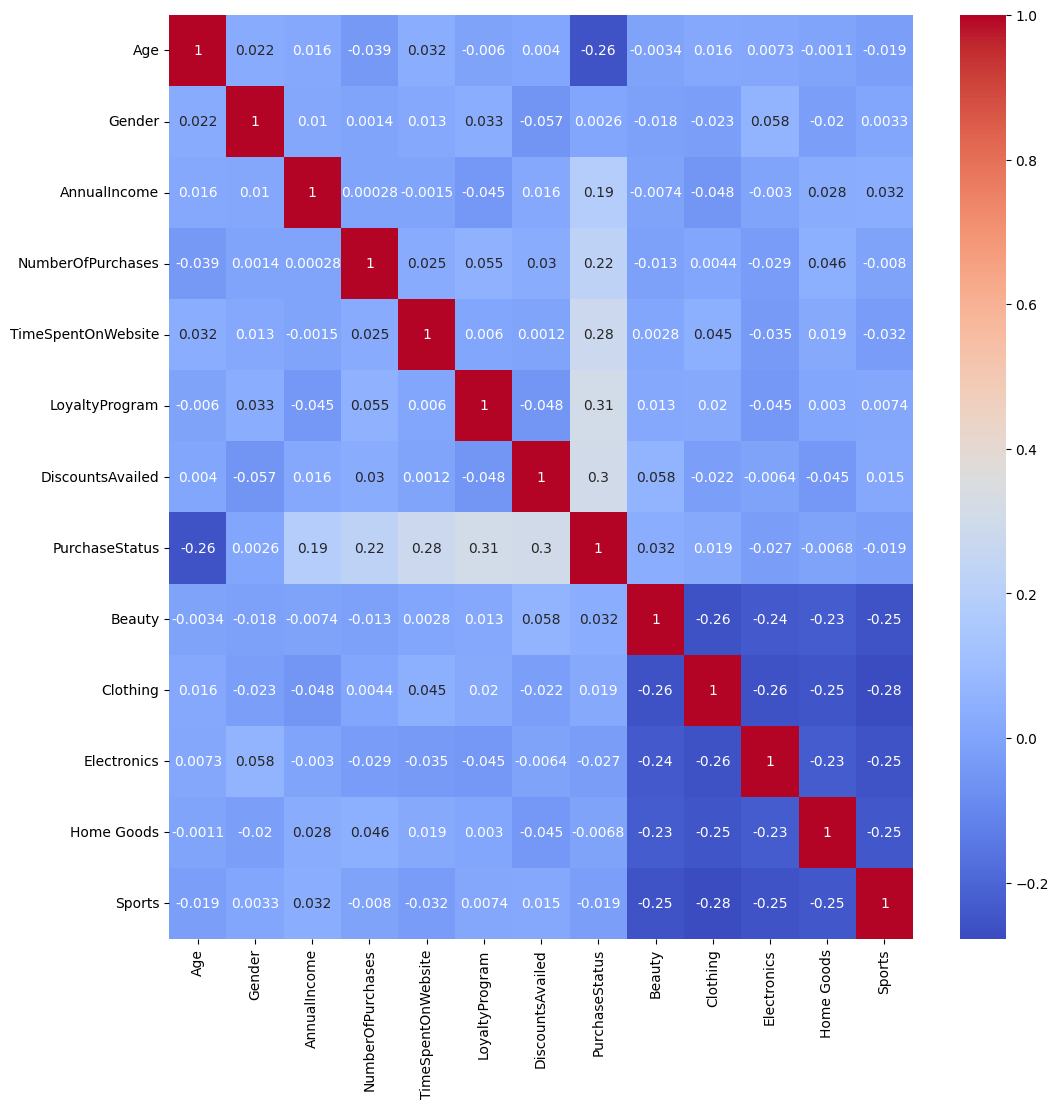

In [ ]:
plt.figure(figsize=(12,12))

sns.heatmap(corr, annot = True, cmap='coolwarm')

In [ ]:
X = final_data.drop('PurchaseStatus', axis = 1)
y = final_data['PurchaseStatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 1051 to 460
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 300 non-null    int64  
 1   Gender              300 non-null    int64  
 2   AnnualIncome        300 non-null    float64
 3   NumberOfPurchases   300 non-null    int64  
 4   TimeSpentOnWebsite  300 non-null    float64
 5   LoyaltyProgram      300 non-null    int64  
 6   DiscountsAvailed    300 non-null    int64  
 7   Beauty              300 non-null    int64  
 8   Clothing            300 non-null    int64  
 9   Electronics         300 non-null    int64  
 10  Home Goods          300 non-null    int64  
 11  Sports              300 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 30.5 KB


Model 1 - Logistic Regression

In [ ]:
lc = LogisticRegression(solver='lbfgs', penalty='none', max_iter=1000)
lc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=1000, penalty='none')

In [ ]:
predictionlc = lc.predict(X_test)

In [ ]:
print(classification_report(y_test, predictionlc))

              precision    recall  f1-score   support

           0       0.79      0.67      0.72       175
           1       0.62      0.75      0.68       125

    accuracy                           0.70       300
   macro avg       0.70      0.71      0.70       300
weighted avg       0.72      0.70      0.71       300



In [ ]:
print(confusion_matrix(y_test, predictionlc))

[[117  58]
 [ 31  94]]


Running same model with changed parameters

In [ ]:

lc = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000)
lc.fit(X_train, y_train)
lc_score = lc.score(X_test, y_test)

print('Accuracy of Logistic Regression with L2 regularization: {:.3f}'.format(lc_score))

Accuracy of Logistic Regression with L2 regularization: 0.707


In [ ]:
predictionlc1 = lc.predict(X_test)

In [ ]:
print(classification_report(y_test, predictionlc1))

              precision    recall  f1-score   support

           0       0.79      0.67      0.73       175
           1       0.62      0.75      0.68       125

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.70       300
weighted avg       0.72      0.71      0.71       300



In [ ]:
print(confusion_matrix(y_test, predictionlc1))

[[118  57]
 [ 31  94]]


In [ ]:
lc = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=100)
lc.fit(X_train, y_train)
lc_score = lc.score(X_test, y_test)

In [ ]:
predictionlc2 = lc.predict(X_test)

In [ ]:
print(classification_report(y_test, predictionlc2))

              precision    recall  f1-score   support

           0       0.79      0.67      0.73       175
           1       0.62      0.75      0.68       125

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.70       300
weighted avg       0.72      0.71      0.71       300



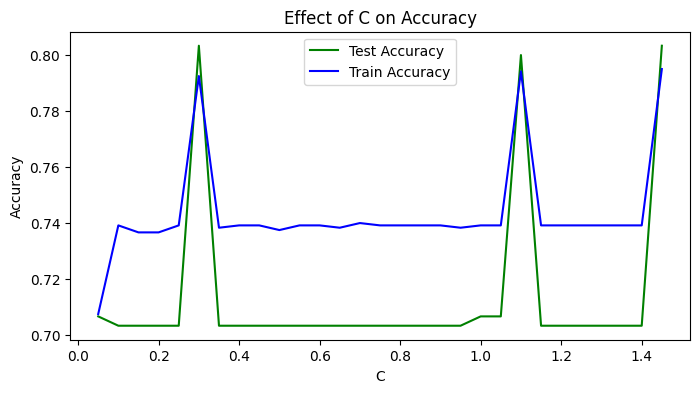

In [ ]:

c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lc = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=10000)
  lc.fit(X_train, y_train)
  test_accuracy.append(lc.score(X_test, y_test))
  train_accuracy.append(lc.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

Model 1 Evaluation

In [ ]:
lc = LogisticRegression(C = 1.1, solver='lbfgs', penalty='l2', max_iter=10000)
lc.fit(X_train, y_train)
lc_score = lc.score(X_test, y_test)

In [ ]:
predictionlcc3 = lc.predict(X_test)

In [ ]:
print(classification_report(y_test, predictionlcc3))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       175
           1       0.73      0.82      0.77       125

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.81      0.80      0.80       300



In [ ]:
print(confusion_matrix(y_test, predictionlcc3))

[[138  37]
 [ 23 102]]


After changing the parameters, the model is performing similar to the model woth default parameters.

Model 2: Decision Tree

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dtree_prediction = dtree.predict(X_test)

In [ ]:
print(classification_report(y_test, dtree_prediction))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       175
           1       0.85      0.84      0.84       125

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



In [ ]:
print(confusion_matrix(y_test, dtree_prediction))

[[156  19]
 [ 20 105]]


Model 2 performing better than Model 1

Model 3 - Random Foresr Model

In [ ]:

rfc = RandomForestClassifier(n_estimators = 300)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
rfc_prediction = rfc.predict(X_test)

Model 2 Evaluation

In [ ]:
print(classification_report(y_test, rfc_prediction))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       175
           1       0.95      0.91      0.93       125

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [ ]:
print(confusion_matrix(y_test, rfc_prediction))

[[169   6]
 [ 11 114]]


True Positives (TP): 116
These are the instances of class 1 that were correctly predicted as class 1.
True Negatives (TN): 169
These are the instances of class 0 that were correctly predicted as class 0.
False Positives (FP): 6
These are the instances of class 0 that were incorrectly predicted as class 1.
False Negatives (FN): 9
These are the instances of class 1 that were incorrectly predicted as class 0.

Model 2 (Random Forest) Model Performs drastically better than Model 1 (Logistic Regression) based on all the scores like Precision, Accuracy, F-Score. Also, based on confusion matrix, Model 2 gives higher True Positives and True Negatives than Model 1.

Nect Step is to try to change parameter in Model 2. We will change the estimators to 400.

In [ ]:
rfc1 = RandomForestClassifier(n_estimators = 400)
rfc1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400)

In [ ]:
rfc1.score(X_test, y_test)

0.9466666666666667

In [ ]:
rfc1.score(X_train, y_train)

1.0

In [ ]:
cv_scores = cross_val_score(rfc1, X, y, cv=10)
cv_scores

array([0.94      , 0.93333333, 0.94666667, 0.94666667, 0.94      ,
       0.95333333, 0.92666667, 0.92      , 0.92666667, 0.95333333])

In [ ]:
np.mean(cv_scores)

0.9386666666666666

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=15, shuffle=True, random_state=42)

In [ ]:
kf_scores = cross_val_score(rfc1, X, y, cv=kf, scoring = 'f1')

In [ ]:
kf_scores

array([1.        , 0.93181818, 0.86666667, 0.89473684, 0.93877551,
       0.94117647, 0.92783505, 0.93506494, 0.91764706, 0.96774194,
       0.9382716 , 0.8988764 , 0.88311688, 0.88607595, 0.94117647])

In [ ]:
np.mean(kf_scores)

0.9245986643204013

In [ ]:
kf_scores2 = cross_val_score(rfc1, X, y, cv=kf, scoring = 'accuracy')

In [ ]:
kf_scores2

array([1.  , 0.93, 0.93, 0.91, 0.95, 0.95, 0.92, 0.96, 0.94, 0.96, 0.94,
       0.89, 0.9 , 0.9 , 0.94])

In [ ]:
np.mean(kf_scores2)

0.9346666666666666

In [ ]:
rfc_prediction1 = rfc1.predict(X_test)

In [ ]:
print(classification_report(y_test, rfc_prediction1))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       175
           1       0.95      0.92      0.93       125

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
print(confusion_matrix(y_test, rfc_prediction1))

[[169   6]
 [ 10 115]]


True Positives (TP): 116
These are the instances of class 1 that were correctly predicted as class 1.
True Negatives (TN): 169
These are the instances of class 0 that were correctly predicted as class 0.
False Positives (FP): 6
These are the instances of class 0 that were incorrectly predicted as class 1.
False Negatives (FN): 9
These are the instances of class 1 that were incorrectly predicted as class 0.


The Model 3 (Random Forest) gave slightly better result by changing the estimator value from 300 to 400.

In [ ]:
final_data.columns

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus', 'Beauty', 'Clothing', 'Electronics', 'Home Goods',
       'Sports'],
      dtype='object')

Model 4: SVC

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
svm_prediction = svm.predict(X_test)

In [ ]:
print(classification_report(y_test, svm_prediction))

              precision    recall  f1-score   support

           0       0.62      0.50      0.55       175
           1       0.45      0.58      0.51       125

    accuracy                           0.53       300
   macro avg       0.54      0.54      0.53       300
weighted avg       0.55      0.53      0.53       300



In [ ]:
print(confusion_matrix(y_test, svm_prediction))

[[87 88]
 [53 72]]


In [ ]:
from sklearn.model_selection import GridSearchCV # Import GridSearchCV from the correct module

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

In [ ]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.1s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.62      0.89      0.73       175
           1       0.58      0.22      0.32       125

    accuracy                           0.61       300
   macro avg       0.60      0.55      0.52       300
weighted avg       0.60      0.61      0.56       300



In [ ]:
print(confusion_matrix(y_test, grid_predictions))

[[155  20]
 [ 97  28]]


Improvement in the model after Grid Search

Comparing All

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       175
           1       0.73      0.82      0.77       125

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.81      0.80      0.80       300

[[138  37]
 [ 23 102]]


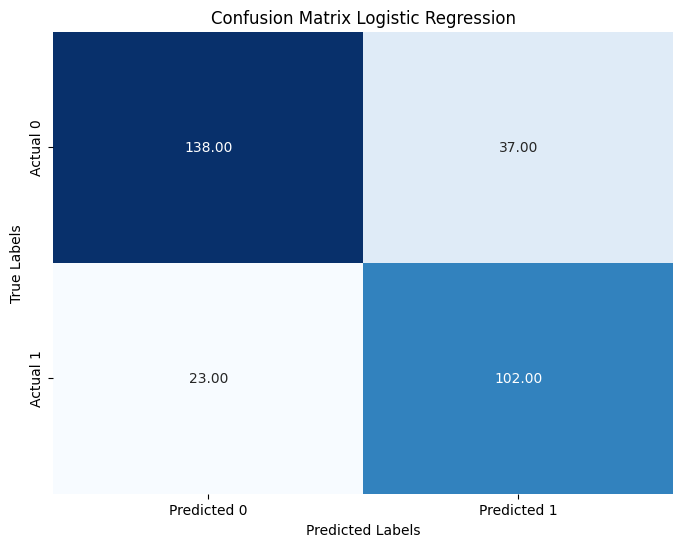

In [ ]:
# Previous code to generate predictions
lc_prediction = rfc.predict(X_test)
print(classification_report(y_test, predictionlcc3))

# Calculate and store the confusion matrix
cm = confusion_matrix(y_test, predictionlcc3)

# Print the confusion matrix (optional)
print(cm)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       175
           1       0.85      0.84      0.84       125

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300

[[156  19]
 [ 20 105]]


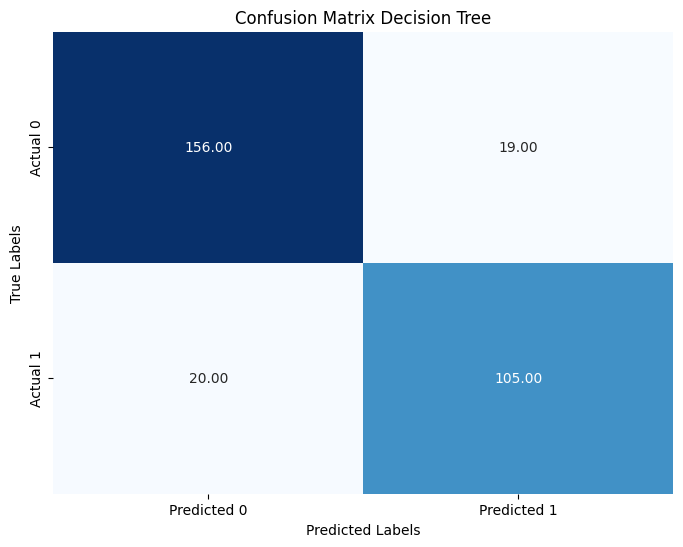

In [ ]:
# Previous code to generate predictions
dtree_prediction1 = dtree.predict(X_test)
print(classification_report(y_test, dtree_prediction))

# Calculate and store the confusion matrix
cm = confusion_matrix(y_test, dtree_prediction)

# Print the confusion matrix (optional)
print(cm)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Decision Tree')
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       175
           1       0.95      0.92      0.93       125

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.95      0.95      0.95       300

[[169   6]
 [ 10 115]]


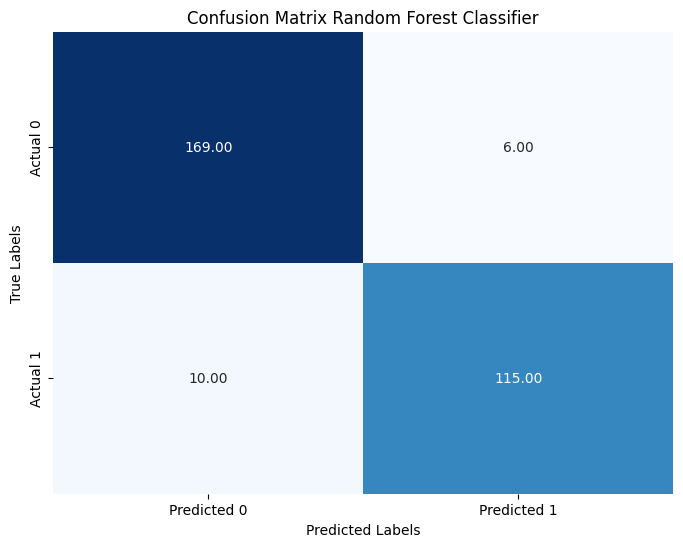

In [ ]:
# Previous code to generate predictions
rfc_prediction = rfc.predict(X_test)
print(classification_report(y_test, rfc_prediction1))

# Calculate and store the confusion matrix
cm = confusion_matrix(y_test, rfc_prediction1)

# Print the confusion matrix (optional)
print(cm)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Random Forest Classifier')
plt.show()

              precision    recall  f1-score   support

           0       0.62      0.89      0.73       175
           1       0.58      0.22      0.32       125

    accuracy                           0.61       300
   macro avg       0.60      0.55      0.52       300
weighted avg       0.60      0.61      0.56       300

[[155  20]
 [ 97  28]]


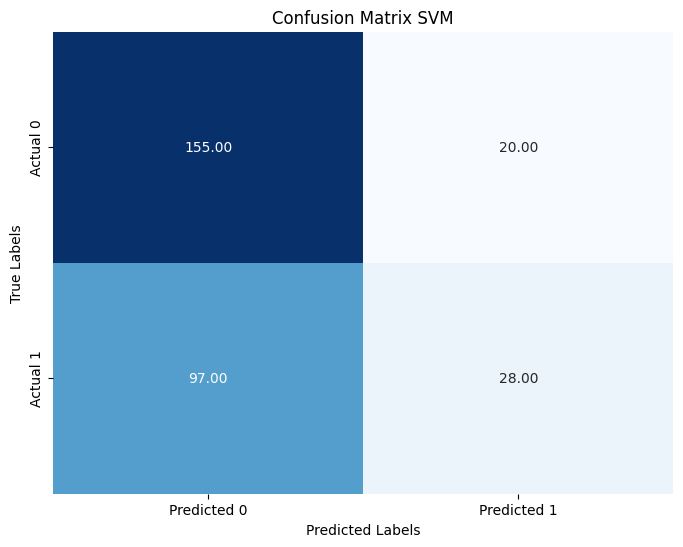

In [ ]:
# Previous code to generate predictions
svm_prediction1 = dtree.predict(X_test)
print(classification_report(y_test, grid_predictions))

# Calculate and store the confusion matrix
cm = confusion_matrix(y_test, grid_predictions)

# Print the confusion matrix (optional)
print(cm)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix SVM')
plt.show()

Random Forest Classifier is the best performing model based on Classification Report and Confusion Matrix Report.